Import Necessary Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
import Levenshtein

Read the data

In [7]:
customers = pd.read_csv("../Datasets/customers.csv")
products = pd.read_csv("../Datasets/products.csv")
transaction_items = pd.read_csv("../Datasets/sales_transaction_items.csv")
transactions = pd.read_csv("../Datasets/sales_transactions.csv")
stock_levels = pd.read_csv("../Datasets/stock_levels.csv")
stores = pd.read_csv("../Datasets/stores.csv")

Customers

In [8]:
customers

,customer_id,name,email,city,phone
0,C0051,Stephen Velasquez,denisemendoza@harris-henderson.com,Aaronland,+1-448-005-1631x1154
1,C0420,Jose Martinez,amberwilkins@lewis-martinez.info,Acevedostad,218.776.4976x69305
2,C0071,Sara Rodriguez,ellenbarnes@yahoo.com,Adamsbury,8594956855
3,C0060,Jenny Williams,travisyork@yahoo.com,Alanmouth,162.137.6128x335
4,C0275,Eric Willis,jessica43@hotmail.com,Alexandriaview,001-796-621-6206x74782
...,...,...,...,...,...
495,C0291,Jessica Scott,cory36@hall.com,Port Monica,(858)232-8046x09565
496,C0095,Kenneth Brown,cindymonroe@clark-hart.com,Lake Colleen,521-658-4016x963
497,C0328,Kenneth Brown,znewman@hotmail.com,South Jeremiahport,788.987.0478x78540
498,C0309,Sarah Peterson,qgarrett@thomas-davis.com,Howardton,001-030-529-6484x8631


products

In [9]:
products

,product_id,product_name,category,brand,price
0,P1000,GoodyearX GripPro 1,Tires,GoodyearX,356.06
1,P1001,GoodyearX Touring 2,Tires,GoodyearX,396.45
2,P1002,GoodyearX SportMax 3,Tires,GoodyearX,107.59
3,P1003,GoodyearX All-Terrain 4,Tires,GoodyearX,279.66
4,P1004,GoodyearX SportMax 5,Tires,GoodyearX,430.12
...,...,...,...,...,...
355,P1355,AlpineMax GPSNavigator 16,Accessories,AlpineMax,462.37
356,P1356,AlpineMax FloorMat 17,Accessories,AlpineMax,458.70
357,P1357,AlpineMax CarStereo 18,Accessories,AlpineMax,411.66
358,P1358,AlpineMax PhoneHolder 19,Accessories,AlpineMax,383.07


In [10]:
products["category"].value_counts()

category
Tires             60
Batteries         60
Oil               60
Shock Absorber    60
Spare Parts       60
Accessories       60
Name: count, dtype: int64

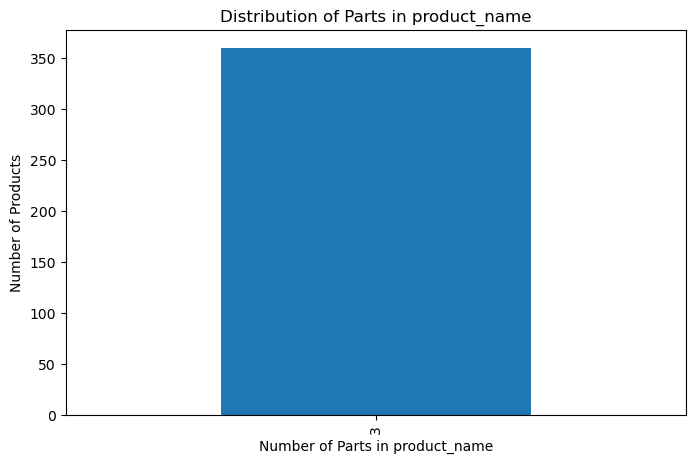

,product_id,product_name,category,brand,price,name_parts_count


In [22]:
# Check the number of parts in each product_name
products['name_parts_count'] = products['product_name'].apply(lambda x: len(str(x).split(' ')))

# Plot the distribution of name_parts_count
plt.figure(figsize=(8,5))
products['name_parts_count'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Number of Parts in product_name')
plt.ylabel('Number of Products')
plt.title('Distribution of Parts in product_name')
plt.show()

# Display rows where product_name does not have exactly 3 parts
products[products['name_parts_count'] != 3]

Text(0.5, 1.0, 'Levenshtein Distance (Model) vs. Price Difference')

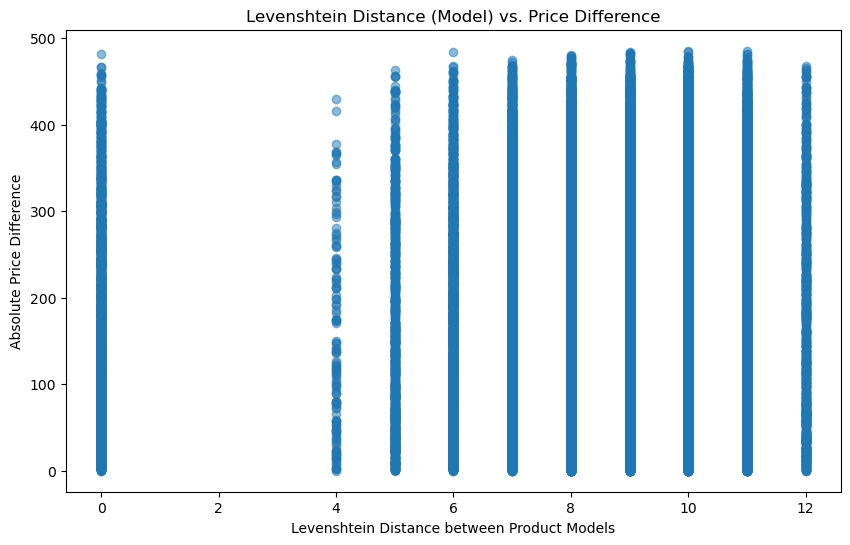

In [ ]:
# Split product_name into brand, model, series (assuming underscore '_' as separator)
products[['brand', 'model', 'series']] = products['product_name'].str.split(' ', expand=True)

# Get all unique product pairs
product_pairs = list(combinations(products.itertuples(index=False), 2))

lev_distances = []
price_diffs = []

for prod1, prod2 in product_pairs:
    # Calculate Levenshtein distance between model only
    dist = Levenshtein.distance(str(prod1.model), str(prod2.model))
    price_diff = abs(prod1.price - prod2.price)
    lev_distances.append(dist)
    price_diffs.append(price_diff)

plt.figure(figsize=(10,6))
plt.scatter(lev_distances, price_diffs, alpha=0.5)
plt.xlabel('Levenshtein Distance between Product Models')
plt.ylabel('Absolute Price Difference')
plt.title('Levenshtein Distance (Model) vs. Price Difference')

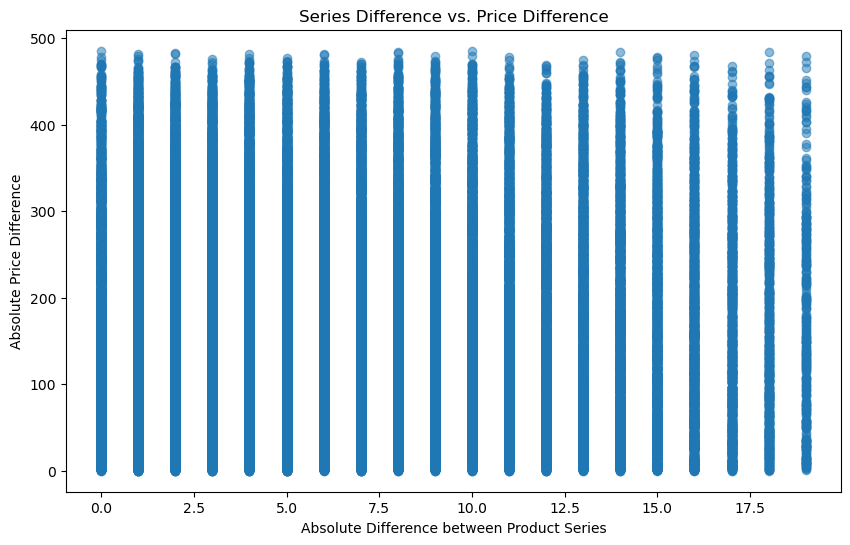

In [26]:
# Get all unique product pairs
product_pairs = list(combinations(products.itertuples(index=False), 2))

series_diffs = []
price_diffs = []

for prod1, prod2 in product_pairs:
    # Calculate absolute difference between series (assuming series is numeric)
    try:
        diff = abs(float(prod1.series) - float(prod2.series))
    except ValueError:
        # If series is not numeric, skip this pair
        continue
    price_diff = abs(prod1.price - prod2.price)
    series_diffs.append(diff)
    price_diffs.append(price_diff)

plt.figure(figsize=(10,6))
plt.scatter(series_diffs, price_diffs, alpha=0.5)
plt.xlabel('Absolute Difference between Product Series')
plt.ylabel('Absolute Price Difference')
plt.title('Series Difference vs. Price Difference')
plt.show()

transaction_items

In [12]:
transaction_items

,transaction_id,product_id,quantity,unit_price,total_price
0,T01052,P1000,1,356.06,356.06
1,T01370,P1000,1,356.06,356.06
2,T01573,P1000,1,356.06,356.06
3,T02798,P1000,1,356.06,356.06
4,T02869,P1000,1,356.06,356.06
...,...,...,...,...,...
9018,T01791,P1359,4,299.26,1197.04
9019,T01824,P1359,4,299.26,1197.04
9020,T02026,P1359,4,299.26,1197.04
9021,T02582,P1359,4,299.26,1197.04


transactions

In [13]:
transactions

,transaction_id,customer_id,store_id,date
0,T00031,C0067,S001,2024-09-18
1,T00119,C0413,S001,2023-10-05
2,T00175,C0200,S001,2025-02-27
3,T00212,C0470,S001,2024-01-05
4,T00243,C0175,S001,2025-03-27
...,...,...,...,...
2995,T02899,C0291,S020,2024-04-21
2996,T02921,C0379,S020,2025-04-23
2997,T02923,C0309,S020,2024-05-18
2998,T02933,C0055,S020,2025-06-16


stock_levels

In [14]:
stock_levels

,store_id,product_id,stock_level
0,S001,P1151,0
1,S001,P1218,0
2,S001,P1157,2
3,S001,P1105,3
4,S001,P1179,3
...,...,...,...
7195,S020,P1315,198
7196,S020,P1184,199
7197,S020,P1352,199
7198,S020,P1282,200


stores

In [15]:
stores

,store_id,store_name,city,address
0,S012,Store 12,Maryfurt,Unit 8010 Box 4476 DPO AA 50046
1,S008,Store 8,Lake Kevinburgh,"499 Elizabeth Via Whiteheadmouth, ME 08111"
2,S009,Store 9,Lake Petershire,"7149 Tamara Mall Garciamouth, TN 86148"
3,S004,Store 4,Simpsonborough,Unit 5223 Box 2333 DPO AP 39696
4,S017,Store 17,West Johnville,"278 Johnson Inlet East Edward, RI 38558"
5,S011,Store 11,Frankfort,"40160 Christine Ways Suite 766 Richardstown, I..."
6,S003,Store 3,East Anneborough,"258 Munoz Tunnel Orozcoland, SC 03518"
7,S007,Store 7,Port Jacob,"206 Yolanda Bypass Apt. 221 Adambury, TN 48400"
8,S002,Store 2,Lake Davidside,46411 Meagan Bypass Suite 705 Lake Jeffreyland...
9,S006,Store 6,East Lindseystad,"1155 Lucas Freeway East Mary, DE 69012"
